In [274]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ensamble_model as em
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import root_mean_squared_error
importlib.reload(em)

# Train Data
fd = '../../data/main_data/train/train.csv'
train = pd.read_csv(fd)

# Test Data
fd = '../../data/main_data/test/test.csv'
test = pd.read_csv(fd)

save_dir = '../saved_models'

## This is a description of how the ensamble model works and what it is doing under all of the code

The general object below is just a general_Regression object that can be changed to any model, like linear regression, Lasso, Ridge, decision tree, random forest, gradient boost regression.  You can also put in the parameters for these in the **kwargs argument, it will deal with it correctly with the names, for example max_depth=6 in a decision tree.


In [275]:
# Baseline model, what we want to beat!

general = em.general_Regression(train,type='LR')
general.perform_CV()

MSE for train: mean: 49961930100825.71 std: 1766190834328.6677
MSE for test:  mean: 52623128336150.98  std: 16157787424202.434

RMSE for train: mean: 7067261.791999064 std: 125462.60070582748
RMSE for test: mean: 7167938.034029451 std: 1115254.5343844176

R^2 for train: mean: 0.4080075808979379 std: 0.006344560557093147
R^2 for test: mean: 0.37092624578357775 std: 0.07693190732988643

MAE for train: mean: 3607039.457153544 std: 52779.976526171595
MAE for test: mean: 3660546.333153931 std: 185378.7775438796

MAPE for train: mean: 4.1040132577792185 std: 0.05894752588702268
MAPE for test: mean: 4.145168032970011 std: 0.5716244798786112



In [276]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = bl_train[general.target] - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,3000000,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,2.944756e+06,5.524426e+04
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,367916,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1.815988e+06,-1.448072e+06
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,4000000,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,1.325027e+07,-9.250266e+06
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,250000,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,-5.469618e+04,3.046962e+05
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,1191864,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,5.778338e+06,-4.586474e+06


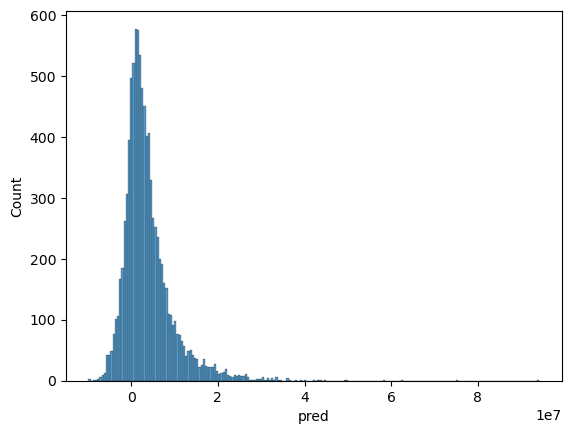

In [277]:
# lets look at the distribution of the target:
sns.histplot(bl_train,x='pred')
plt.show()

In [278]:
# So we are getting negative numbers, this is not good!

In [279]:
# Baseline model, what we want to beat! With log(1+x)

general = em.general_Regression(train,type='LR', scale='log')
general.perform_CV()

MSE for train: mean: 0.9718164149663101 std: 0.006342523732242709
MSE for test:  mean: 0.9921637184791379  std: 0.056137283121664806

RMSE for train: mean: 0.9858022401021957 std: 0.003218443071235086
RMSE for test: mean: 0.9956784978399931 std: 0.02807218228483316

R^2 for train: mean: 0.4981374205877124 std: 0.003474816348959797
R^2 for test: mean: 0.4863840926024576 std: 0.03369637922275931

MAE for train: mean: 0.7713606371136246 std: 0.002240436248096857
MAE for test: mean: 0.7777574257083772 std: 0.019352880107775722

MAPE for train: mean: 0.055535082158550145 std: 0.0001856827653518238
MAPE for test: mean: 0.05597502483068435 std: 0.0016292739650973025



In [280]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['adjusted_market_value'] = general.scale_target(bl_train['adjusted_market_value'])
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = general.scale_target(bl_train[general.target]) - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.602267,-10.835060
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.500276,-10.874476
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.974872,-13.189750
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.627130,-11.029697
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.190491,-11.483039


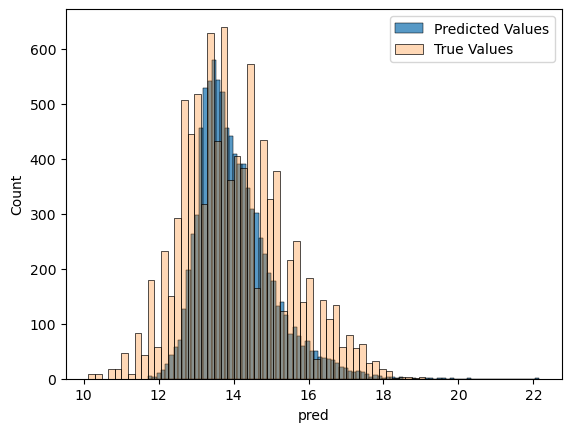

In [281]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(bl_train,x='pred',label='Predicted Values')
sns.histplot(bl_train,x='adjusted_market_value',alpha=0.3,label='True Values')
plt.legend()
plt.show()

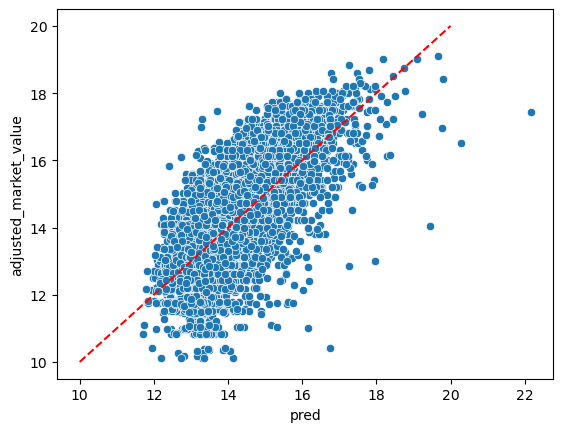

In [282]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(bl_train,x='pred',y='adjusted_market_value',ax=ax)
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [283]:
# Train RMSE
y_train = general.scale_target(train['adjusted_market_value'])
y_pred = general.predict(train)
print(root_mean_squared_error(y_train,y_pred))

0.9863047717705439


In [284]:
# Test RMSE
y_test = general.scale_target(test['adjusted_market_value'])
y_pred = general.predict(test)
print(root_mean_squared_error(y_test,y_pred))

1.0172866677067536


In [ ]:
# How is this for each position on train?

# G 
g_pos = train[train['pos'] == 'G']

y_g_true =GBR_general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = GBR_general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = train[train['pos'] == 'D']

y_d_true = GBR_general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = GBR_general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = train[train['pos'] == 'M']

y_m_true = GBR_general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = GBR_general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = train[train['pos'] == 'F']

y_f_true = GBR_general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = GBR_general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

In [285]:
# Lets look Ridge Regression.
lasso_gen = em.general_Regression(train,scale='log',type='LASSO',alpha=0.5)
lasso_gen.perform_CV()

MSE for train: mean: 1.6737541541850902 std: 0.010408475630759624
MSE for test:  mean: 1.6756209057091458  std: 0.06917687454507407

RMSE for train: mean: 1.2937302517638543 std: 0.0040236620291522205
RMSE for test: mean: 1.2941819642376937 std: 0.02671982692703368

R^2 for train: mean: 0.13564793770281036 std: 0.005242165261386348
R^2 for test: mean: 0.13362331880396988 std: 0.013032362367500945

MAE for train: mean: 1.0302339042265567 std: 0.0033731440882600354
MAE for test: mean: 1.0307185678682125 std: 0.023749644544765552

MAPE for train: mean: 0.07357077667311258 std: 0.0002695477465624575
MAPE for test: mean: 0.07360321313017362 std: 0.00180896182195152



In [286]:
# Lets look Ridge Regression.
ridge_gen = em.general_Regression(train,scale='log',type='RIDGE',alpha=0.5)
ridge_gen.perform_CV()

MSE for train: mean: 0.9729214155116901 std: 0.006326105926258748
MSE for test:  mean: 0.9929803586225885  std: 0.05597646725162419

RMSE for train: mean: 0.9863625708907282 std: 0.0032084665376666114
RMSE for test: mean: 0.9960916847833083 std: 0.027959151062557662

R^2 for train: mean: 0.4975667131964139 std: 0.003476618719231999
R^2 for test: mean: 0.4859495466311611 std: 0.03384644729570121

MAE for train: mean: 0.7715584117826318 std: 0.0022381631470221263
MAE for test: mean: 0.7778083423296334 std: 0.01914076752723104

MAPE for train: mean: 0.05554879272526374 std: 0.0001861007674373714
MAPE for test: mean: 0.05597868352772324 std: 0.0016180836358534684



In [287]:
# PCA with linear regression
pca_gen = em.general_Regression(train,scale='log',type='PCA_LR')
pca_gen.perform_CV()

MSE for train: mean: 0.971816169868915 std: 0.006342613640214103
MSE for test:  mean: 0.9921632725003938  std: 0.056135846089562874

RMSE for train: mean: 0.985802115638023 std: 0.00321848916615995
RMSE for test: mean: 0.995678293722138 std: 0.02807147860312665

R^2 for train: mean: 0.49813754699682705 std: 0.003474883209685947
R^2 for test: mean: 0.48638433284911364 std: 0.03369549656406351

MAE for train: mean: 0.7713607827617334 std: 0.002240182311040633
MAE for test: mean: 0.777757398670872 std: 0.01935280058760194

MAPE for train: mean: 0.05553509578226434 std: 0.00018565722348660836
MAPE for test: mean: 0.055975024088887826 std: 0.0016292573934600842



In [288]:
# PCA with linear regression
pca_ridge_gen = em.general_Regression(train,scale='log',type='PCA_RIDGE',alpha=5)
pca_ridge_gen.perform_CV()

MSE for train: mean: 0.9747722411110301 std: 0.0063180314597548574
MSE for test:  mean: 0.9945127404310572  std: 0.05595981073138884

RMSE for train: mean: 0.9873003549955508 std: 0.003201583465957831
RMSE for test: mean: 0.9968616586041499 std: 0.027920853067922326

R^2 for train: mean: 0.4966108017334395 std: 0.003489619769384348
R^2 for test: mean: 0.4851504501461079 std: 0.033941507544997904

MAE for train: mean: 0.7722596942870688 std: 0.0022486922714900813
MAE for test: mean: 0.7783719780050773 std: 0.019155720281849455

MAPE for train: mean: 0.055595957976140455 std: 0.0001871771923255805
MAPE for test: mean: 0.05601639558952115 std: 0.0016197769199968993



In [289]:
# Finally, lets try a GBR model on the whole feature space:

GBR_general = em.general_Regression(train,scale='log',type='GBR',max_depth= 2, n_estimators= 40, min_samples_split= 10, min_samples_leaf= 2, bootstrap= True)
GBR_general.perform_CV()

MSE for train: mean: 0.6091010826258227 std: 0.009233995411413702
MSE for test:  mean: 0.6960880877918336  std: 0.04814994130951273

RMSE for train: mean: 0.7804267499410626 std: 0.005930480777570978
RMSE for test: mean: 0.833825427121665 std: 0.028692244199548956

R^2 for train: mean: 0.6854550574690992 std: 0.004488850182293707
R^2 for test: mean: 0.639981604758725 std: 0.022257231426323888

MAE for train: mean: 0.6053980704744953 std: 0.004223787643106349
MAE for test: mean: 0.6474260938779878 std: 0.018937062919592743

MAPE for train: mean: 0.04349664793364326 std: 0.00030359099523145043
MAPE for test: mean: 0.04646953768203312 std: 0.001448110409346156



In [290]:
# experiment and look at the residuals and predictions:
gbr_train = train.copy()
gbr_train['adjusted_market_value'] = GBR_general.scale_target(gbr_train['adjusted_market_value'])
gbr_train['pred'] = GBR_general.predict(gbr_train)
gbr_train['residual'] = GBR_general.scale_target(gbr_train[general.target]) - gbr_train['pred']
gbr_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.467200,-10.699993
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,12.985648,-10.359848
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,13.733928,-10.948805
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.657559,-11.060126
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,13.888580,-11.181128


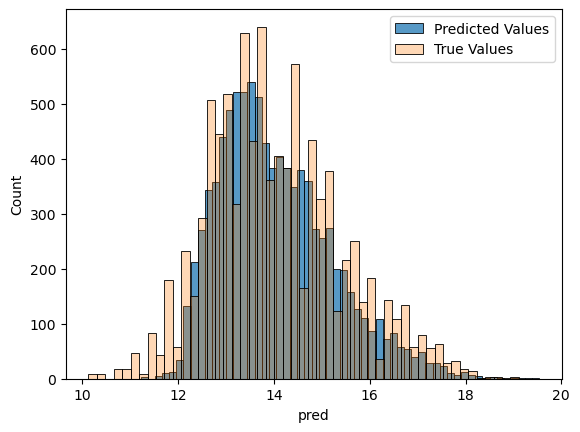

In [291]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(gbr_train,x='pred',label='Predicted Values')
sns.histplot(gbr_train,x='adjusted_market_value',alpha=0.3, label='True Values')
plt.legend()
plt.show()

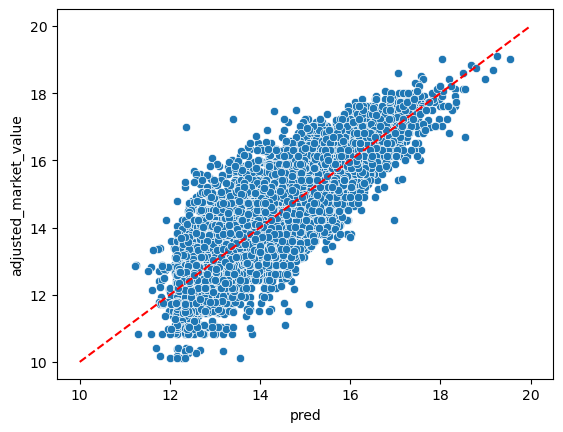

In [292]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(gbr_train,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [293]:
# Train RMSE
y_train = GBR_general.scale_target(train['adjusted_market_value'])
y_pred = GBR_general.predict(train)
print(root_mean_squared_error(y_train,y_pred))

0.7798410007450084


In [294]:
# Test RMSE
y_test = GBR_general.scale_target(test['adjusted_market_value'])
y_pred = GBR_general.predict(test)
print(root_mean_squared_error(y_test,y_pred))

0.859271522348807


In [295]:
# How is this for each position on train?

# G 
g_pos = train[train['pos'] == 'G']

y_g_true =GBR_general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = GBR_general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = train[train['pos'] == 'D']

y_d_true = GBR_general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = GBR_general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = train[train['pos'] == 'M']

y_m_true = GBR_general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = GBR_general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = train[train['pos'] == 'F']

y_f_true = GBR_general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = GBR_general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.7872081996691895
d-position:
 RMSE train: 0.7575841961515573
m-position:
 RMSE train: 0.7818421461296695
d-position:
 RMSE train: 0.8042012447846437


In [296]:
# How is this for each position on test?

# G 
g_pos = test[test['pos'] == 'G']

y_g_true =GBR_general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = GBR_general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = test[test['pos'] == 'D']

y_d_true = GBR_general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = GBR_general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = test[test['pos'] == 'M']

y_m_true = GBR_general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = GBR_general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = test[test['pos'] == 'F']

y_f_true = GBR_general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = GBR_general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.9468830858745763
d-position:
 RMSE train: 0.8373782936365142
m-position:
 RMSE train: 0.8611871575634283
d-position:
 RMSE train: 0.8534295015145531


In [ ]:
# Lets do Hyperparameter tuning on just all of the features.
gen_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3)

#### Furthermore, lets look at how each of the variables 

### Position models
The classes G_Pos, D_Pos, M_Pos, F_Pos, are inherited classes of the general_Regression model above, but specificalyly designed to take in X that only correspond to its position.   If you look at the code in ensamble_mode.py, you can see what features it has for each position, which is what it is using for its model.  Since this is inherits the code from general_Regression, it has all the features of that class.

#### Model for Goalkeepers

In [297]:
#base line model for the G-position
g_model = em.G_Pos(train, scale = 'log')
g_model.perform_CV()


MSE for train: mean: 1.22591402345411 std: 0.006828025727353453
MSE for test:  mean: 1.2314295300362061  std: 0.062059345086368005

RMSE for train: mean: 1.1072057193888885 std: 0.003085191508442723
RMSE for test: mean: 1.1093485822244284 std: 0.02784336820244279

R^2 for train: mean: 0.36692526251810664 std: 0.002074083260167264
R^2 for test: mean: 0.3633141191758053 std: 0.019922672686285878

MAE for train: mean: 0.8809492466319812 std: 0.0021147368907913967
MAE for test: mean: 0.8826425924614609 std: 0.01884921484786094

MAPE for train: mean: 0.06322154612302026 std: 0.00016149021925134568
MAPE for test: mean: 0.06333693700665695 std: 0.0014310499490877236



In [ ]:
g_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=4.5,model=em.G_Pos)
print(g_hp.best_score)
print(g_hp.best_params)

1.0742204320334674
{'model': 'RFR', 'param': {'max_depth': 5, 'n_estimators': 60, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}}


In [299]:
# Checking better model from hyperparameter tuning
g_hp.best_model.perform_CV()

MSE for train: mean: 0.7982316547922752 std: 0.0065876210748503986
MSE for test:  mean: 0.8658061280613497  std: 0.06516346658295605

RMSE for train: mean: 0.8934304908209694 std: 0.0036895614478080607
RMSE for test: mean: 0.9298293101636759 std: 0.034979737304507215

R^2 for train: mean: 0.5901634238882247 std: 0.003021722288448256
R^2 for test: mean: 0.5543647802643793 std: 0.012313666122706794

MAE for train: mean: 0.7120714777301521 std: 0.003359961584950748
MAE for test: mean: 0.7405078605126455 std: 0.030333830606435255

MAPE for train: mean: 0.050732423066583876 std: 0.0002355522723886922
MAPE for test: mean: 0.052713123871136455 std: 0.0019399093696973561



In [300]:
em.save_general(save_dir,'G',g_hp.best_params,g_hp.best_score,RMSE_train=g_hp.best_RMSE_train,RMSE_test=g_hp.best_RMSE_test)

In [301]:
# Test a random model:
g_specific = em.G_Pos(train,type='RFR',scale='log',max_depth=3,n_estimators=200,max_features=.75,min_samples_split=5,min_samples_leaf=2,bootstrap=True)
g_specific.perform_CV()

MSE for train: mean: 1.0280319124287618 std: 0.00709774000534064
MSE for test:  mean: 1.0452442876778494  std: 0.058452197769641265

RMSE for train: mean: 1.0139130372964353 std: 0.00350217490698284
RMSE for test: mean: 1.021979411356123 std: 0.028326144143568946

R^2 for train: mean: 0.46910619995112623 std: 0.003949789286476522
R^2 for test: mean: 0.4592636599351544 std: 0.02805253430918725

MAE for train: mean: 0.8064493646828137 std: 0.0025950076119910155
MAE for test: mean: 0.8128769663543245 std: 0.020876693139791028

MAPE for train: mean: 0.057341563758869285 std: 0.00020575129450257866
MAPE for test: mean: 0.05778983436249886 std: 0.0016109118992588965



In [302]:
# baseline model for the D-position
d_model = em.D_Pos(train,scale='log')
d_model.perform_CV()

MSE for train: mean: 0.987961258589283 std: 0.006683446288828691
MSE for test:  mean: 1.0063665170562737  std: 0.05897083160872448

RMSE for train: mean: 0.9939567128459608 std: 0.0033632689061735208
RMSE for test: mean: 1.0027500638763334 std: 0.029305740944106484

R^2 for train: mean: 0.48980112750348315 std: 0.0034804301073545476
R^2 for test: mean: 0.4791353808264889 std: 0.03334695611751453

MAE for train: mean: 0.7761123498824782 std: 0.0024231706258158446
MAE for test: mean: 0.78161709972238 std: 0.021594302801163517

MAPE for train: mean: 0.05585964255073576 std: 0.00019635286940125835
MAPE for test: mean: 0.056234200798305836 std: 0.0017530010961269086



In [ ]:
# Lets look at the D-position and try to make it better.
#from hypertuning, it looks like random forest regressor works well

d_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=4.5,model=em.D_Pos)
print(d_hp.best_score)
print(d_hp.best_params)

1.101181472058512
{'model': 'RFR', 'param': {'max_depth': 4, 'n_estimators': 90, 'max_features': 0.25, 'min_samples_split': 5, 'min_samples_leaf': 8, 'bootstrap': False}}


In [304]:
d_hp.best_model.perform_CV()

MSE for train: mean: 0.885403882126617 std: 0.008598750334834053
MSE for test:  mean: 0.9378195966716356  std: 0.06750063179962916

RMSE for train: mean: 0.9409479334862508 std: 0.004568215687894981
RMSE for test: mean: 0.9677776625778918 std: 0.03501417551375059

R^2 for train: mean: 0.5454120207140774 std: 0.003414910643442774
R^2 for test: mean: 0.5172163074037586 std: 0.0128010290790421

MAE for train: mean: 0.7435119250380715 std: 0.003213527239806378
MAE for test: mean: 0.7644489880965926 std: 0.02588067864779724

MAPE for train: mean: 0.05292219645944479 std: 0.0002210680678767346
MAPE for test: mean: 0.05438521431417546 std: 0.0015678707021830854



In [305]:
em.save_general(save_dir,'D',d_hp.best_params,d_hp.best_score,RMSE_train=d_hp.best_RMSE_train,RMSE_test=d_hp.best_RMSE_test)

In [306]:
# Test specific d-model:
d_specific = em.D_Pos(train,type='RFR',scale='log',max_depth=None,n_estimators=200,max_features=.5,min_samples_split=10,min_samples_leaf=2,bootstrap=True)
d_specific.perform_CV()

MSE for train: mean: 0.20511290066674323 std: 0.0012393475337775031
MSE for test:  mean: 0.6316846016781288  std: 0.0386167898995741

RMSE for train: mean: 0.4528918504066217 std: 0.0013683939525677923
RMSE for test: mean: 0.7944208658339077 std: 0.024085049425594154

R^2 for train: mean: 0.8940760196889859 std: 0.0007146930911604751
R^2 for test: mean: 0.6730836549381269 std: 0.020986129848042278

MAE for train: mean: 0.33853291452471806 std: 0.0009418688316805947
MAE for test: mean: 0.6170372518286394 std: 0.016508957639507986

MAPE for train: mean: 0.024327583696234743 std: 7.06054399727439e-05
MAPE for test: mean: 0.04424932086456401 std: 0.001308861894684505



In [307]:
#baseline model for the M-position
m_model = em.M_Pos(train,scale='log')
m_model.perform_CV()

MSE for train: mean: 0.9843446354184389 std: 0.006599502477681897
MSE for test:  mean: 1.0026610274759913  std: 0.05822550588149237

RMSE for train: mean: 0.9921358620155323 std: 0.003326668173367171
RMSE for test: mean: 1.000909066751958 std: 0.02901840053682956

R^2 for train: mean: 0.4916687454630805 std: 0.003446101566907866
R^2 for test: mean: 0.4810508179921594 std: 0.0330444951431252

MAE for train: mean: 0.7752565200774655 std: 0.002377056734925064
MAE for test: mean: 0.7809257187143217 std: 0.021203109052552745

MAPE for train: mean: 0.05580615727370001 std: 0.00019403533453101713
MAPE for test: mean: 0.056191755968460246 std: 0.0017327890978573784



In [ ]:
# Lets improve the m-model
m_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=4.5,model=em.M_Pos)
print(m_hp.best_score)
print(m_hp.best_params)

1.0989403847898565
{'model': 'RFR', 'param': {'max_depth': 4, 'n_estimators': 30, 'max_features': 0.25, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}}


In [309]:
m_hp.best_model.perform_CV()

MSE for train: mean: 0.8925350001023196 std: 0.010032601713102518
MSE for test:  mean: 0.9394165731933205  std: 0.06422165613748254

RMSE for train: mean: 0.9447257859397682 std: 0.005309376875591184
RMSE for test: mean: 0.9686577620346618 std: 0.03344717093149905

R^2 for train: mean: 0.5417567784926174 std: 0.003600992125398194
R^2 for test: mean: 0.5161291495423064 std: 0.017663503491337877

MAE for train: mean: 0.746279765768012 std: 0.0038527511770684963
MAE for test: mean: 0.7652230886436808 std: 0.026128795395350044

MAPE for train: mean: 0.053115256958327785 std: 0.0002548824804212516
MAPE for test: mean: 0.054434729994510225 std: 0.0015990406153532672



In [310]:
em.save_general(save_dir,'M',m_hp.best_params,m_hp.best_score,RMSE_train=m_hp.best_RMSE_train,RMSE_test=m_hp.best_RMSE_test)

In [311]:
# Test specific m-model:
m_specific = em.M_Pos(train,type='LR',scale='log')
m_specific.perform_CV()

MSE for train: mean: 0.9843446354184389 std: 0.006599502477681897
MSE for test:  mean: 1.0026610274759913  std: 0.05822550588149237

RMSE for train: mean: 0.9921358620155323 std: 0.003326668173367171
RMSE for test: mean: 1.000909066751958 std: 0.02901840053682956

R^2 for train: mean: 0.4916687454630805 std: 0.003446101566907866
R^2 for test: mean: 0.4810508179921594 std: 0.0330444951431252

MAE for train: mean: 0.7752565200774655 std: 0.002377056734925064
MAE for test: mean: 0.7809257187143217 std: 0.021203109052552745

MAPE for train: mean: 0.05580615727370001 std: 0.00019403533453101713
MAPE for test: mean: 0.056191755968460246 std: 0.0017327890978573784



In [312]:
#Baseline model for $F$-position
f_model = em.F_Pos(train,scale='log')
f_model.perform_CV()

MSE for train: mean: 0.987961258589283 std: 0.006683446288828691
MSE for test:  mean: 1.0063665170562737  std: 0.05897083160872448

RMSE for train: mean: 0.9939567128459608 std: 0.0033632689061735208
RMSE for test: mean: 1.0027500638763334 std: 0.029305740944106484

R^2 for train: mean: 0.48980112750348315 std: 0.0034804301073545476
R^2 for test: mean: 0.4791353808264889 std: 0.03334695611751453

MAE for train: mean: 0.7761123498824782 std: 0.0024231706258158446
MAE for test: mean: 0.78161709972238 std: 0.021594302801163517

MAPE for train: mean: 0.05585964255073576 std: 0.00019635286940125835
MAPE for test: mean: 0.056234200798305836 std: 0.0017530010961269086



In [ ]:
# Lets improve the F-model
f_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=4.5,model=em.F_Pos)
print(f_hp.best_score)
print(f_hp.best_params)

1.0696925470091434
{'model': 'RFR', 'param': {'max_depth': 5, 'n_estimators': 10, 'max_features': 0.75, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}}


In [314]:
f_hp.best_model.perform_CV()

MSE for train: mean: 0.7283236052988925 std: 0.006884694109247532
MSE for test:  mean: 0.8092156352415613  std: 0.05481802605863694

RMSE for train: mean: 0.853409225477016 std: 0.004037223007487075
RMSE for test: mean: 0.8990422493918402 std: 0.030637706344010078

R^2 for train: mean: 0.6260590727494473 std: 0.0029291195500707047
R^2 for test: mean: 0.5832666421841786 std: 0.012165731062072594

MAE for train: mean: 0.672778596436081 std: 0.0032967673690471235
MAE for test: mean: 0.7071936624364057 std: 0.026705299458000084

MAPE for train: mean: 0.04795229459909704 std: 0.0002233384303137526
MAPE for test: mean: 0.05038239668508104 std: 0.0017198986272891205



In [315]:
em.save_general(save_dir,'F',f_hp.best_params,f_hp.best_score,RMSE_train=f_hp.best_RMSE_train,RMSE_test=f_hp.best_RMSE_test)

## The ensamble model
This is a new class that builds a model for all the positions and puts it together.  The way to set it up is as follows in the next cell.

In [33]:
# To set up the ensamble model with your specifications we do the following:

ex = em.ensamble_model(scale='log')    # this sets up the class ready to take inthe parameters and the data for fitting

ex.G_parameters(type = 'LR') # put the parameters for the G model as just linear regression
ex.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ex.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

# Note that any left our parameters changes, for example M here, is left as just Linear regression

# Once you set up what your model is, we can fit the data to it
ex.fit(train)

# It is now fitted to the data and read to predict things:
result = train.copy()
result[ex.target] = ex.scale_target(result[ex.target])

result['prediction']= ex.predict(train)
result['residual'] = abs(result[ex.target] - result['prediction'])

display(result)


,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,prediction,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.625808,1.288315
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.514280,0.698667
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.496563,0.294758
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.544847,1.115626
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.057601,0.066571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,michael svoboda,1998-10-14,D,195.0,right,2024-10-20,1500000.0,14.220976,Venezia,Serie A,...,29.730769,2.653846,0.038462,0.000000,0.038870,0.042371,0.117319,0.117319,14.464836,0.243859
9363,kalifa coulibaly,1991-08-20,F,197.0,right,2022-05-21,1500000.0,14.370794,Nantes,Ligue 1,...,7.405941,0.099010,0.069307,0.000000,0.050634,0.219190,0.265225,0.053416,14.450305,0.079512
9364,nordin jackers,1997-09-04,G,185.0,right,2024-04-28,900000.0,13.710151,Club Brugge KV,"First Division A, Championship Round",...,20.742857,10.514286,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,13.666569,0.043582
9365,mads kikkenborg,1999-10-06,G,197.0,right,2023-12-03,800000.0,13.647174,Lyngby,Superligaen,...,16.488372,7.023256,0.000000,0.488372,0.000000,0.000000,0.000000,0.000000,13.922657,0.275484


# Now lets say you want to figure out which model is the best through a cross-validation.
You can do the above, but now you use a perform_CV(train) to do a cross-validation with the type of parameters you put in
For example:

In [36]:
# make the ensamble model object
ensamble = em.ensamble_model(scale='log')

ensamble.G_parameters(type = 'DT') # put the parameters for the G model as just linear regression
ensamble.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ensamble.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

ensamble.perform_CV(train)

MSE for train: mean: 0.7447681352296309 std: 0.006134996963473714
MSE for test:  mean: 0.9970257610457217  std: 0.06568384573124325

RMSE for train: mean: 0.8629921916154022 std: 0.003551399791051874
RMSE for test: mean: 0.9979734327488321 std: 0.0327839682350073

R^2 for train: mean: 0.6153933446381987 std: 0.002741171726794568
R^2 for test: mean: 0.4842985102039633 std: 0.031129588333427292

MAE for train: mean: 0.6420626256506956 std: 0.002477738683135178
MAE for test: mean: 0.7771672055319406 std: 0.020928391000426858

MAPE for train: mean: 0.04608210603021121 std: 0.00018383726205094345
MAPE for test: mean: 0.05585562483149635 std: 0.001628357580220057



In [89]:
ex = em.ensamble_model(scale='log')
ex.G_parameters(type ='GBR',max_depth = 2, n_estimators = 10,max_features = 0.75, min_samples_split = 5, min_samples_leaf=4,
                bootstrap=True)
ex.D_parameters(type ='GBR', max_depth= 2, n_estimators= 40, max_features= 'sqrt', min_samples_split= 10,
                 min_samples_leaf=2, bootstrap= True )
ex.M_parameters(type='GBR',max_depth=2, n_estimators= 40, max_features= 0.25, min_samples_split= 5,
                 min_samples_leaf=1, bootstrap= True)
ex.F_parameters(type = 'GBR',max_depth= 2, n_estimators= 40, max_features= 0.5, min_samples_split= 2,
                 min_samples_leaf= 5, bootstrap=True)
ex.perform_CV(train)

MSE for train: mean: 0.5569110223153684 std: 0.007250390583410693
MSE for test:  mean: 0.8004242018666347  std: 0.052041440474732886

RMSE for train: mean: 0.7462489269818838 std: 0.004853997708651101
RMSE for test: mean: 0.8942000799135957 std: 0.02881699063319775

R^2 for train: mean: 0.7124022518384336 std: 0.003763633602842667
R^2 for test: mean: 0.5857910492833115 std: 0.02777526830110715

MAE for train: mean: 0.5793641848566887 std: 0.004004150310516548
MAE for test: mean: 0.6965161607327714 std: 0.020991336036524137

MAPE for train: mean: 0.04165949533443455 std: 0.0002938729829286943
MAPE for test: mean: 0.04989065340867574 std: 0.0016407123846776733



In [90]:
ex_data = train.copy()
ex.fit(ex_data)
ex_data['pred'] = ex.predict(ex_data)
ex_data['adjusted_market_value'] = ex.scale_target(ex_data['adjusted_market_value'])
ex_data.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.088227
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.103743
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,14.161387
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.799298
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.827176


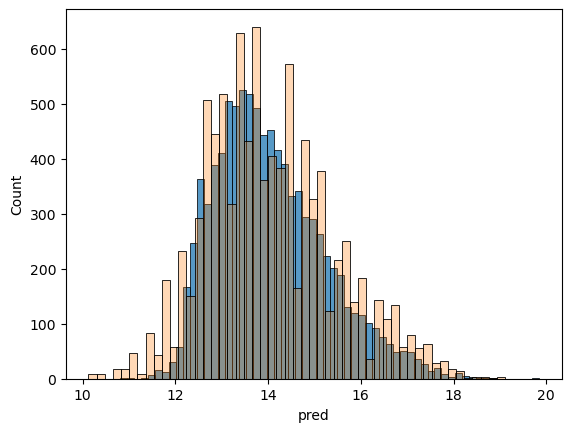

In [91]:
# Histogram for our model
fig,ax = plt.subplots()
sns.histplot(ex_data,x='pred',ax=ax)
sns.histplot(ex_data,x='adjusted_market_value',ax=ax,alpha=0.3)
plt.show()

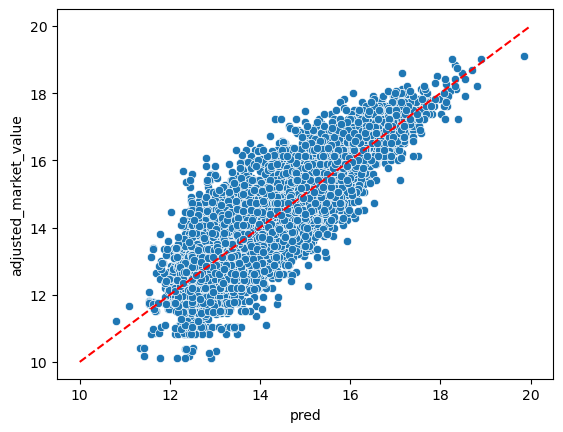

In [92]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(ex_data,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [115]:
# This test an ensemble model of the best parameters above for each position


pos_hp = em.ensamble_model(scale='log')
pos_hp.G_parameters(type ='GBR',max_depth = 2, n_estimators = 20, min_samples_split = 5, min_samples_leaf=6,
                bootstrap=True)
pos_hp.D_parameters(type ='GBR', max_depth= 2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf=6, bootstrap= True )
pos_hp.M_parameters(type='GBR',max_depth=2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf=6, bootstrap= True)
pos_hp.F_parameters(type = 'GBR',max_depth= 2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf= 6, bootstrap=True)
pos_hp.perform_CV(train)


MSE for train: mean: 0.5058215047191013 std: 0.005725525509109351
MSE for test:  mean: 0.7826048083223532  std: 0.047240866197177885

RMSE for train: mean: 0.7111998785759064 std: 0.004029569793077779
RMSE for test: mean: 0.8842480995123605 std: 0.02664782976401305

R^2 for train: mean: 0.7387859055680972 std: 0.002950250044346332
R^2 for test: mean: 0.5953263305494383 std: 0.019385490569794935

MAE for train: mean: 0.5522637299987372 std: 0.0027222741934034016
MAE for test: mean: 0.6889906847799121 std: 0.020027678806685833

MAPE for train: mean: 0.039736665108006275 std: 0.0002023772566037469
MAPE for test: mean: 0.04938157175430649 std: 0.0014444425203791393



In [116]:
pos_hp_data = train.copy()
pos_hp.fit(pos_hp_data)
pos_hp_data['pred'] = pos_hp.predict(pos_hp_data)
pos_hp_data['adjusted_market_value'] = pos_hp.scale_target(pos_hp_data['adjusted_market_value'])
pos_hp_data.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.915862
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.429812
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,14.726981
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,12.977044
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.674679


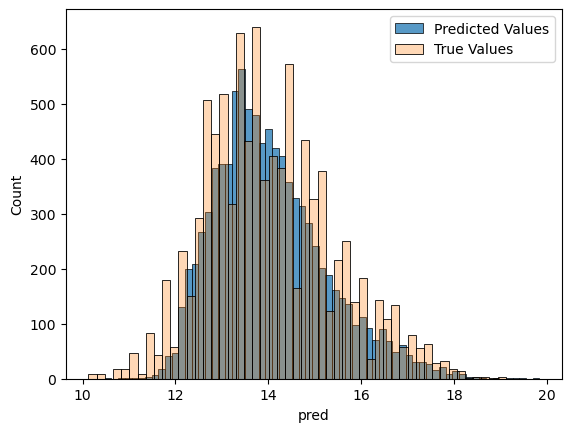

In [117]:
# Histogram for our model
fig,ax = plt.subplots()
sns.histplot(pos_hp_data,x='pred',ax=ax,label='Predicted Values')
sns.histplot(pos_hp_data,x='adjusted_market_value',ax=ax,alpha=0.3,label='True Values')
plt.legend()
plt.show()

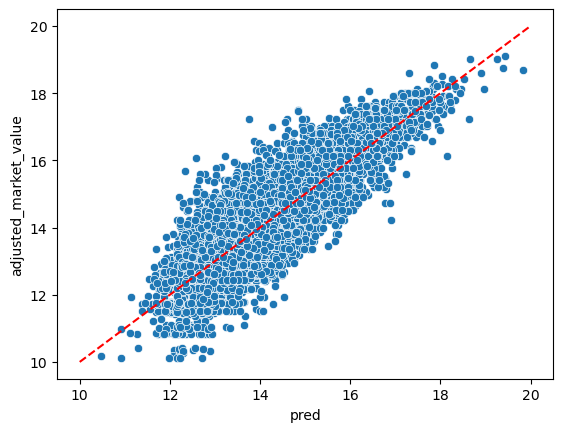

In [118]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(pos_hp_data,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

## Hyperparameter tuning

This takes in the set of possible parameters defined in the ensamble_model.py and randomly chooses them as it goes through the n_iter=100

In [10]:
# Lets try some hyperparameter tuning:

hp = em.hyperparameter_tuning(train,n_iter=1000,cv=3,scale='log',beta=1)

# After it gets done doing its hyperparameter tuning, it saves the best model, the parameters for that model, and the score 
# (which is just RMSE for now, I can change it later to do what ever score you want to use)

print(hp.best_params)  # Best parameters in a dictionary object
print(hp.best_score)   # the best RMSE
print(hp.best_model)   # the ensamble_model() object that has the best parameters above and score.

# You can now use the hp.best_model to do predictions and we can save it later once we have the one we want.

# you can now do 
best_model_prediction = hp.best_model.predict(train)


{'G': {'model': 'LR', 'param': {}}, 'D': {'model': 'LR', 'param': {}}, 'M': {'model': 'RFR', 'param': {'max_depth': 5, 'n_estimators': 20, 'max_features': 0.75, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}}, 'F': {'model': 'RIDGE', 'param': {'alpha': np.float64(4.183673469387755)}}}
1.013867233554123


In [11]:
hp.best_model.perform_CV(train)

MSE for train: mean: 0.8410724137239306 std: 0.005425015400903937
MSE for test:  mean: 0.9111503585256846  std: 0.04821973676867641

RMSE for train: mean: 0.9170952176239971 std: 0.002962352970896379
RMSE for test: mean: 0.9542062352765253 std: 0.0253144046954571

R^2 for train: mean: 0.5656580614959832 std: 0.002640790302511171
R^2 for test: mean: 0.5284766099473235 std: 0.026728189756051148

MAE for train: mean: 0.7183515422398641 std: 0.00163673570855802
MAE for test: mean: 0.7468300286997503 std: 0.01799796187270791

MAPE for train: mean: 0.05158278487137735 std: 0.0001331801037556778
MAPE for test: mean: 0.05358336375531612 std: 0.001460397945291499

